In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import Lasso

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Agablue-red/Machine-Learning/master/data/data_rate.csv', index_col=0)
data["Date"] = pd.to_datetime(data["Date"])

In [3]:
#Creating month interval

month_group_sum = data.groupby([pd.Grouper(key='Date', freq='M'), 'symbol']).return_rate.sum()
data_month_rate = pd.DataFrame(month_group_sum).reset_index()

month_group_mean = data.groupby([pd.Grouper(key='Date', freq='M'), 'symbol']).score.mean()
data_month_score = pd.DataFrame(month_group_mean).reset_index()

data_month = pd.DataFrame({"Date":data_month_rate["Date"],
                           "symbol": data_month_rate["symbol"],"score":data_month_score["score"], "rate":data_month_rate["return_rate"]})

In [4]:
#Creating 6 month interval

hyear_group_sum = data.groupby([pd.Grouper(key='Date', freq='6M'), 'symbol']).return_rate.sum()
data_hyear_rate = pd.DataFrame(hyear_group_sum).reset_index()

hyear_group_mean = data.groupby([pd.Grouper(key='Date', freq='6M'), 'symbol']).score.mean()
data_hyear_score = pd.DataFrame(hyear_group_mean).reset_index()

data_hyear = pd.DataFrame({"Date":data_hyear_rate["Date"],"symbol": data_hyear_rate["symbol"],"score":data_hyear_score["score"], "rate":data_hyear_rate["return_rate"]})

In [5]:
#Creating year interval

year_group_sum = data.groupby([pd.Grouper(key='Date', freq='Y'), 'symbol']).return_rate.sum()
data_year_rate = pd.DataFrame(year_group_sum).reset_index()

year_group_mean = data.groupby([pd.Grouper(key='Date', freq='Y'), 'symbol']).score.mean()
data_year_score = pd.DataFrame(year_group_mean).reset_index()

data_year = pd.DataFrame({"Date":data_year_rate["Date"],"symbol": data_year_rate["symbol"],"score":data_year_score["score"], "rate":data_year_rate["return_rate"]})

# 1 MONTH

In [6]:
X_month = np.array(list(data_month.iloc[:, 2]))
y_month = np.array(list(data_month.iloc[:, 3]))

## SVR MODEL

In [7]:
scores_month_SVR = []
best_svr = SVR(kernel='rbf')
kf = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X_month):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X_month[train_index], X_month[test_index], y_month[train_index], y_month[test_index]
    print(X_train)
    best_svr.fit(X_train.reshape(-1, 1), y_train)
    scores_month_SVR.append(best_svr.score(X_test.reshape(-1, 1), y_test))

Train Index:  [    0     1     2 ... 15777 15778 15780] 

Test Index:  [    3    14    19 ... 15774 15775 15779]
[0.66204726 0.66806105 0.74437505 ... 0.77899681 0.80271737 0.71815284]
Train Index:  [    1     2     3 ... 15778 15779 15780] 

Test Index:  [    0     8    15 ... 15736 15758 15777]
[0.66806105 0.74437505 0.90972568 ... 0.80271737 0.8291815  0.71815284]
Train Index:  [    0     1     2 ... 15778 15779 15780] 

Test Index:  [   17    36    39 ... 15762 15763 15766]
[0.66204726 0.66806105 0.74437505 ... 0.80271737 0.8291815  0.71815284]
Train Index:  [    0     1     2 ... 15778 15779 15780] 

Test Index:  [   10    23    29 ... 15741 15742 15767]
[0.66204726 0.66806105 0.74437505 ... 0.80271737 0.8291815  0.71815284]
Train Index:  [    0     1     2 ... 15777 15778 15779] 

Test Index:  [   12    20    28 ... 15773 15776 15780]
[0.66204726 0.66806105 0.74437505 ... 0.77899681 0.80271737 0.8291815 ]
Train Index:  [    0     1     2 ... 15778 15779 15780] 

Test Index:  [   

In [8]:
SVR_1M_MAE = np.mean(np.absolute(scores_month_SVR - y_test.reshape(-1, 1)))
SVR_1M_MSE = ((scores_month_SVR - y_test.reshape(-1, 1))**2).mean()
print("Mean squared error (MSE) for 1M SVR Model: %.5f" % SVR_1M_MSE)
print("Mean absolute error (MAE) for 1M SVR Model: %.5f" % SVR_1M_MAE)

Mean squared error (MSE) for 1M SVR Model: 0.00702
Mean absolute error (MAE) for 1M SVR Model: 0.05581


## Decision Tree Regressor

In [9]:
scores_month_DT = []
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)
kf = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X_month):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X_month[train_index], X_month[test_index], y_month[train_index], y_month[test_index]
    print(X_train)
    dtree.fit(X_train.reshape(-1, 1), y_train)
    scores_month_DT.append(dtree.score(X_test.reshape(-1, 1), y_test))

Train Index:  [    0     1     2 ... 15777 15778 15780] 

Test Index:  [    3    14    19 ... 15774 15775 15779]
[0.66204726 0.66806105 0.74437505 ... 0.77899681 0.80271737 0.71815284]
Train Index:  [    1     2     3 ... 15778 15779 15780] 

Test Index:  [    0     8    15 ... 15736 15758 15777]
[0.66806105 0.74437505 0.90972568 ... 0.80271737 0.8291815  0.71815284]
Train Index:  [    0     1     2 ... 15778 15779 15780] 

Test Index:  [   17    36    39 ... 15762 15763 15766]
[0.66204726 0.66806105 0.74437505 ... 0.80271737 0.8291815  0.71815284]
Train Index:  [    0     1     2 ... 15778 15779 15780] 

Test Index:  [   10    23    29 ... 15741 15742 15767]
[0.66204726 0.66806105 0.74437505 ... 0.80271737 0.8291815  0.71815284]
Train Index:  [    0     1     2 ... 15777 15778 15779] 

Test Index:  [   12    20    28 ... 15773 15776 15780]
[0.66204726 0.66806105 0.74437505 ... 0.77899681 0.80271737 0.8291815 ]
Train Index:  [    0     1     2 ... 15778 15779 15780] 

Test Index:  [   

In [10]:
DT_1M_MAE = np.mean(np.absolute(scores_month_DT - y_test.reshape(-1, 1)))
DT_1M_MSE = ((scores_month_DT - y_test.reshape(-1, 1))**2).mean()
print("Mean squared error (MSE) for 1M Decision Tree Regressor: %.5f" % DT_1M_MSE)
print("Mean absolute error (MAE) for 1M Decision Tree Regressor: %.5f" % DT_1M_MAE)

Mean squared error (MSE) for 1M Decision Tree Regressor: 0.00719
Mean absolute error (MAE) for 1M Decision Tree Regressor: 0.05678


## LASSO Regression

In [11]:
scores_month_LASSO = []
lasso_reg = Lasso(alpha=0.1)
kf = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X_month):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X_month[train_index], X_month[test_index], y_month[train_index], y_month[test_index]
    print(X_train)
    lasso_reg.fit(X_train.reshape(-1, 1), y_train)
    scores_month_LASSO.append(lasso_reg.score(X_test.reshape(-1, 1), y_test))

Train Index:  [    0     1     2 ... 15777 15778 15780] 

Test Index:  [    3    14    19 ... 15774 15775 15779]
[0.66204726 0.66806105 0.74437505 ... 0.77899681 0.80271737 0.71815284]
Train Index:  [    1     2     3 ... 15778 15779 15780] 

Test Index:  [    0     8    15 ... 15736 15758 15777]
[0.66806105 0.74437505 0.90972568 ... 0.80271737 0.8291815  0.71815284]
Train Index:  [    0     1     2 ... 15778 15779 15780] 

Test Index:  [   17    36    39 ... 15762 15763 15766]
[0.66204726 0.66806105 0.74437505 ... 0.80271737 0.8291815  0.71815284]
Train Index:  [    0     1     2 ... 15778 15779 15780] 

Test Index:  [   10    23    29 ... 15741 15742 15767]
[0.66204726 0.66806105 0.74437505 ... 0.80271737 0.8291815  0.71815284]
Train Index:  [    0     1     2 ... 15777 15778 15779] 

Test Index:  [   12    20    28 ... 15773 15776 15780]
[0.66204726 0.66806105 0.74437505 ... 0.77899681 0.80271737 0.8291815 ]
Train Index:  [    0     1     2 ... 15778 15779 15780] 

Test Index:  [   

In [12]:
LASSO_1M_MAE = np.mean(np.absolute(scores_month_LASSO - y_test.reshape(-1, 1)))
LASSO_1M_MSE = ((scores_month_LASSO - y_test.reshape(-1, 1))**2).mean()
print("Mean squared error (MSE) for 1M LASSO Regression: %.5f" % LASSO_1M_MSE)
print("Mean absolute error (MAE) for 1M LASSO Regression: %.5f" % LASSO_1M_MAE)

Mean squared error (MSE) for 1M LASSO Regression: 0.00706
Mean absolute error (MAE) for 1M LASSO Regression: 0.05599


# 6 MONTH

In [13]:
X_hyear = np.array(list(data_hyear.iloc[:, 2]))
y_hyear = np.array(list(data_hyear.iloc[:, 3]))

## SVR MODEL

In [14]:
scores_hyear_SVR = []
best_svr = SVR(kernel='rbf')
kf = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X_hyear):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X_hyear[train_index], X_hyear[test_index], y_hyear[train_index], y_hyear[test_index]
    print(X_train)
    best_svr.fit(X_train.reshape(-1, 1), y_train)
    scores_hyear_SVR.append(best_svr.score(X_test.reshape(-1, 1), y_test))

Train Index:  [   0    1    2 ... 6268 6269 6272] 

Test Index:  [  14   17   19   23   31   37   41   45   50   65   79   80   84   88
   91   93  101  132  156  157  167  168  177  185  198  199  208  217
  221  228  230  233  239  248  254  259  263  265  296  308  318  319
  323  324  325  346  351  371  376  378  393  401  408  410  425  432
  437  465  468  469  472  476  491  501  506  511  534  535  538  544
  561  565  576  599  604  611  622  625  626  672  681  683  696  705
  706  712  736  746  747  752  755  756  763  764  794  800  811  864
  865  893  907  932  964  977  996 1018 1022 1027 1032 1038 1039 1046
 1047 1073 1074 1079 1084 1090 1092 1103 1119 1129 1158 1163 1174 1175
 1176 1186 1188 1192 1193 1197 1199 1215 1220 1223 1235 1261 1268 1272
 1315 1321 1328 1330 1351 1357 1375 1393 1400 1406 1421 1426 1451 1454
 1471 1485 1487 1488 1498 1499 1501 1520 1533 1535 1550 1554 1559 1561
 1569 1586 1593 1608 1611 1616 1620 1634 1672 1695 1703 1718 1721 1730
 1740 1741 1

In [15]:
SVR_6M_MAE = np.mean(np.absolute(scores_hyear_SVR - y_test.reshape(-1, 1)))
SVR_6M_MSE = ((scores_hyear_SVR - y_test.reshape(-1, 1))**2).mean()
print("Mean squared error (MSE) for 6M SVR Model: %.5f" % SVR_6M_MSE)
print("Mean absolute error (MAE) for 6M SVR Model: %.5f" % SVR_6M_MAE)

Mean squared error (MSE) for 6M SVR Model: 0.01477
Mean absolute error (MAE) for 6M SVR Model: 0.08662


## Decision Tree Regressor

In [16]:
scores_hyear_DT = []
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)
kf = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X_hyear):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X_hyear[train_index], X_hyear[test_index], y_hyear[train_index], y_hyear[test_index]
    print(X_train)
    dtree.fit(X_train.reshape(-1, 1), y_train)
    scores_hyear_DT.append(dtree.score(X_test.reshape(-1, 1), y_test))

Train Index:  [   0    1    2 ... 6268 6269 6272] 

Test Index:  [  14   17   19   23   31   37   41   45   50   65   79   80   84   88
   91   93  101  132  156  157  167  168  177  185  198  199  208  217
  221  228  230  233  239  248  254  259  263  265  296  308  318  319
  323  324  325  346  351  371  376  378  393  401  408  410  425  432
  437  465  468  469  472  476  491  501  506  511  534  535  538  544
  561  565  576  599  604  611  622  625  626  672  681  683  696  705
  706  712  736  746  747  752  755  756  763  764  794  800  811  864
  865  893  907  932  964  977  996 1018 1022 1027 1032 1038 1039 1046
 1047 1073 1074 1079 1084 1090 1092 1103 1119 1129 1158 1163 1174 1175
 1176 1186 1188 1192 1193 1197 1199 1215 1220 1223 1235 1261 1268 1272
 1315 1321 1328 1330 1351 1357 1375 1393 1400 1406 1421 1426 1451 1454
 1471 1485 1487 1488 1498 1499 1501 1520 1533 1535 1550 1554 1559 1561
 1569 1586 1593 1608 1611 1616 1620 1634 1672 1695 1703 1718 1721 1730
 1740 1741 1

In [17]:
DT_6M_MAE = np.mean(np.absolute(scores_hyear_DT - y_test.reshape(-1, 1)))
DT_6M_MSE = ((scores_hyear_DT - y_test.reshape(-1, 1))**2).mean()
print("Mean squared error (MSE) for 6M Decision Tree Regressor: %.5f" % DT_6M_MSE)
print("Mean absolute error (MAE) for 6M Decision Tree Regressor: %.5f" % DT_6M_MAE)

Mean squared error (MSE) for 6M Decision Tree Regressor: 0.01599
Mean absolute error (MAE) for 6M Decision Tree Regressor: 0.09145


## LASSO Regression

In [18]:
scores_hyear_LASSO = []
lasso_reg = Lasso(alpha=0.1)
kf = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X_hyear):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X_hyear[train_index], X_hyear[test_index], y_hyear[train_index], y_hyear[test_index]
    print(X_train)
    lasso_reg.fit(X_train.reshape(-1, 1), y_train)
    scores_hyear_LASSO.append(lasso_reg.score(X_test.reshape(-1, 1), y_test))

Train Index:  [   0    1    2 ... 6268 6269 6272] 

Test Index:  [  14   17   19   23   31   37   41   45   50   65   79   80   84   88
   91   93  101  132  156  157  167  168  177  185  198  199  208  217
  221  228  230  233  239  248  254  259  263  265  296  308  318  319
  323  324  325  346  351  371  376  378  393  401  408  410  425  432
  437  465  468  469  472  476  491  501  506  511  534  535  538  544
  561  565  576  599  604  611  622  625  626  672  681  683  696  705
  706  712  736  746  747  752  755  756  763  764  794  800  811  864
  865  893  907  932  964  977  996 1018 1022 1027 1032 1038 1039 1046
 1047 1073 1074 1079 1084 1090 1092 1103 1119 1129 1158 1163 1174 1175
 1176 1186 1188 1192 1193 1197 1199 1215 1220 1223 1235 1261 1268 1272
 1315 1321 1328 1330 1351 1357 1375 1393 1400 1406 1421 1426 1451 1454
 1471 1485 1487 1488 1498 1499 1501 1520 1533 1535 1550 1554 1559 1561
 1569 1586 1593 1608 1611 1616 1620 1634 1672 1695 1703 1718 1721 1730
 1740 1741 1

In [19]:
LASSO_6M_MAE = np.mean(np.absolute(scores_hyear_LASSO - y_test.reshape(-1, 1)))
LASSO_6M_MSE = ((scores_hyear_LASSO - y_test.reshape(-1, 1))**2).mean()
print("Mean squared error (MSE) for 6M LASSO Regression: %.5f" % LASSO_6M_MSE)
print("Mean absolute error (MAE) for 6M LASSO Regression: %.5f" % LASSO_6M_MAE)

Mean squared error (MSE) for 6M LASSO Regression: 0.01507
Mean absolute error (MAE) for 6M LASSO Regression: 0.08786


# 1 YEAR

In [20]:
X_year = np.array(list(data_year.iloc[:, 2]))
y_year = np.array(list(data_year.iloc[:, 3]))

## SVR MODEL

In [21]:
scores_year_SVR = []
best_svr = SVR(kernel='rbf')
kf = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X_year):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X_year[train_index], X_year[test_index], y_year[train_index], y_year[test_index]
    print(X_train)
    best_svr.fit(X_train.reshape(-1, 1), y_train)
    scores_year_SVR.append(best_svr.score(X_test.reshape(-1, 1), y_test))

Train Index:  [   0    1    2 ... 4436 4437 4439] 

Test Index:  [   8   17   19   33   51   61   69   70   80   84   93   96  109  120
  134  139  144  149  150  151  152  157  166  175  179  184  205  211
  238  239  252  274  287  290  296  297  298  305  308  309  315  318
  371  376  387  410  414  415  416  429  438  443  457  463  468  471
  478  486  497  505  538  544  551  555  561  584  594  596  599  602
  621  625  626  668  670  677  693  718  731  744  746  751  764  776
  783  787  790  800  811  812  833  838  843  856  857  871  877  888
  907  911  937  960  964  969  978  990  996 1001 1020 1025 1027 1034
 1038 1041 1044 1057 1068 1074 1084 1106 1116 1123 1129 1146 1158 1161
 1173 1174 1175 1178 1188 1204 1207 1216 1235 1253 1258 1260 1264 1268
 1299 1321 1323 1330 1338 1350 1370 1407 1411 1412 1417 1424 1427 1432
 1434 1444 1467 1468 1474 1482 1483 1488 1491 1509 1510 1522 1533 1536
 1539 1543 1545 1551 1552 1558 1572 1598 1614 1615 1620 1652 1666 1672
 1684 1720 1

In [22]:
SVR_1Y_MAE = np.mean(np.absolute(scores_year_SVR - y_test.reshape(-1, 1)))
SVR_1Y_MSE = ((scores_year_SVR - y_test.reshape(-1, 1))**2).mean()
print("Mean squared error (MSE) for 1Y SVR Model: %.5f" % SVR_1Y_MSE)
print("Mean absolute error (MAE) for 1Y SVR Model: %.5f" % SVR_1Y_MAE)

Mean squared error (MSE) for 1Y SVR Model: 0.03901
Mean absolute error (MAE) for 1Y SVR Model: 0.11689


## Decision Tree Regressor

In [23]:
scores_year_DT = []
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)
kf = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X_year):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X_year[train_index], X_year[test_index], y_year[train_index], y_year[test_index]
    print(X_train)
    dtree.fit(X_train.reshape(-1, 1), y_train)
    scores_year_DT.append(dtree.score(X_test.reshape(-1, 1), y_test))

Train Index:  [   0    1    2 ... 4436 4437 4439] 

Test Index:  [   8   17   19   33   51   61   69   70   80   84   93   96  109  120
  134  139  144  149  150  151  152  157  166  175  179  184  205  211
  238  239  252  274  287  290  296  297  298  305  308  309  315  318
  371  376  387  410  414  415  416  429  438  443  457  463  468  471
  478  486  497  505  538  544  551  555  561  584  594  596  599  602
  621  625  626  668  670  677  693  718  731  744  746  751  764  776
  783  787  790  800  811  812  833  838  843  856  857  871  877  888
  907  911  937  960  964  969  978  990  996 1001 1020 1025 1027 1034
 1038 1041 1044 1057 1068 1074 1084 1106 1116 1123 1129 1146 1158 1161
 1173 1174 1175 1178 1188 1204 1207 1216 1235 1253 1258 1260 1264 1268
 1299 1321 1323 1330 1338 1350 1370 1407 1411 1412 1417 1424 1427 1432
 1434 1444 1467 1468 1474 1482 1483 1488 1491 1509 1510 1522 1533 1536
 1539 1543 1545 1551 1552 1558 1572 1598 1614 1615 1620 1652 1666 1672
 1684 1720 1

In [24]:
DT_1Y_MAE = np.mean(np.absolute(scores_year_DT - y_test.reshape(-1, 1)))
DT_1Y_MSE = ((scores_year_DT - y_test.reshape(-1, 1))**2).mean()
print("Mean squared error (MSE) for 1Y Decision Tree Regressor: %.5f" % DT_1Y_MSE)
print("Mean absolute error (MAE) for 1Y Decision Tree Regressor: %.5f" % DT_1Y_MAE)

Mean squared error (MSE) for 1Y Decision Tree Regressor: 0.04129
Mean absolute error (MAE) for 1Y Decision Tree Regressor: 0.12315


## LASSO Regression

In [25]:
scores_year_LASSO = []
lasso_reg = Lasso(alpha=0.1)
kf = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X_year):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X_year[train_index], X_year[test_index], y_year[train_index], y_year[test_index]
    print(X_train)
    lasso_reg.fit(X_train.reshape(-1, 1), y_train)
    scores_year_LASSO.append(lasso_reg.score(X_test.reshape(-1, 1), y_test))

Train Index:  [   0    1    2 ... 4436 4437 4439] 

Test Index:  [   8   17   19   33   51   61   69   70   80   84   93   96  109  120
  134  139  144  149  150  151  152  157  166  175  179  184  205  211
  238  239  252  274  287  290  296  297  298  305  308  309  315  318
  371  376  387  410  414  415  416  429  438  443  457  463  468  471
  478  486  497  505  538  544  551  555  561  584  594  596  599  602
  621  625  626  668  670  677  693  718  731  744  746  751  764  776
  783  787  790  800  811  812  833  838  843  856  857  871  877  888
  907  911  937  960  964  969  978  990  996 1001 1020 1025 1027 1034
 1038 1041 1044 1057 1068 1074 1084 1106 1116 1123 1129 1146 1158 1161
 1173 1174 1175 1178 1188 1204 1207 1216 1235 1253 1258 1260 1264 1268
 1299 1321 1323 1330 1338 1350 1370 1407 1411 1412 1417 1424 1427 1432
 1434 1444 1467 1468 1474 1482 1483 1488 1491 1509 1510 1522 1533 1536
 1539 1543 1545 1551 1552 1558 1572 1598 1614 1615 1620 1652 1666 1672
 1684 1720 1

In [26]:
LASSO_1Y_MAE = np.mean(np.absolute(scores_year_LASSO - y_test.reshape(-1, 1)))
LASSO_1Y_MSE = ((scores_year_LASSO - y_test.reshape(-1, 1))**2).mean()
print("Mean squared error (MSE) for 1Y LASSO Regression: %.5f" % LASSO_1Y_MSE)
print("Mean absolute error (MAE) for 1Y LASSO Regression: %.5f" % LASSO_1Y_MAE)

Mean squared error (MSE) for 1Y LASSO Regression: 0.04023
Mean absolute error (MAE) for 1Y LASSO Regression: 0.11999


## Comparison  performance of the models against each other for the various investment horizons

### R-squared

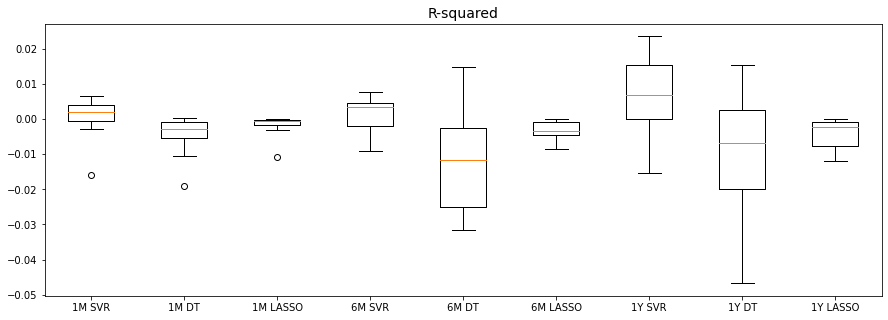

In [27]:
plt.subplots(figsize=(15, 5))

models = []
models.append((scores_month_SVR))
models.append((scores_month_DT))
models.append((scores_month_LASSO))

models.append((scores_hyear_SVR))
models.append((scores_hyear_DT))
models.append((scores_hyear_LASSO)) 

models.append((scores_year_SVR))
models.append((scores_year_DT))
models.append((scores_year_LASSO))


plt.boxplot(models)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], 
           ['1M SVR', '1M DT', '1M LASSO', '6M SVR', '6M DT', '6M LASSO', '1Y SVR', '1Y DT', '1Y LASSO'])
plt.title('R-squared', fontsize=14)
plt.show()

### Mean Absolute Error

In [28]:
print("Mean absolute error (MAE) for 1M SVR Model: %.5f" % SVR_1M_MAE)
print("Mean absolute error (MAE) for 1M Decision Tree Regressor: %.5f" % DT_1M_MAE)
print("Mean absolute error (MAE) for 1M LASSO Regression: %.5f" % LASSO_1M_MAE)

Mean absolute error (MAE) for 1M SVR Model: 0.05581
Mean absolute error (MAE) for 1M Decision Tree Regressor: 0.05678
Mean absolute error (MAE) for 1M LASSO Regression: 0.05599


**According to MAE, the best model is SVR for half year interval.**

In [29]:
print("Mean absolute error (MAE) for 6M SVR Model: %.5f" % SVR_6M_MAE)
print("Mean absolute error (MAE) for 6M Decision Tree Regressor: %.5f" % DT_6M_MAE)
print("Mean absolute error (MAE) for 6M LASSO Regression: %.5f" % LASSO_6M_MAE)

Mean absolute error (MAE) for 6M SVR Model: 0.08662
Mean absolute error (MAE) for 6M Decision Tree Regressor: 0.09145
Mean absolute error (MAE) for 6M LASSO Regression: 0.08786


**According to MAE, the best model is SVR for half year interval.**

In [30]:
print("Mean absolute error (MAE) for 1Y SVR Model: %.5f" % SVR_1Y_MAE)
print("Mean absolute error (MAE) for 1Y Decision Tree Regressor: %.5f" % DT_1Y_MAE)
print("Mean absolute error (MAE) for 1Y LASSO Regression: %.5f" % LASSO_1Y_MAE)

Mean absolute error (MAE) for 1Y SVR Model: 0.11689
Mean absolute error (MAE) for 1Y Decision Tree Regressor: 0.12315
Mean absolute error (MAE) for 1Y LASSO Regression: 0.11999


**According to MAE, the best model is SVR for year interval.**

### Mean Squared Error

In [31]:
print("Mean squared error (MSE) for 1M SVR Model: %.5f" % SVR_1M_MSE)
print("Mean squared error (MSE) for 1M Decision Tree Regressor: %.5f" % DT_1M_MSE)
print("Mean squared error (MSE) for 1M LASSO Regression: %.5f" % LASSO_1M_MSE)

Mean squared error (MSE) for 1M SVR Model: 0.00702
Mean squared error (MSE) for 1M Decision Tree Regressor: 0.00719
Mean squared error (MSE) for 1M LASSO Regression: 0.00706


**According to MSE, the best model is SVR for month interval.**

In [32]:
print("Mean squared error (MSE) for 6M SVR Model: %.5f" % SVR_6M_MSE)
print("Mean squared error (MSE) for 6M Decision Tree Regressor: %.5f" % DT_6M_MSE)
print("Mean squared error (MSE) for 6M LASSO Regression: %.5f" % LASSO_6M_MSE)

Mean squared error (MSE) for 6M SVR Model: 0.01477
Mean squared error (MSE) for 6M Decision Tree Regressor: 0.01599
Mean squared error (MSE) for 6M LASSO Regression: 0.01507


**According to MSE, the best model is SVR for half year interval.**

In [33]:
print("Mean squared error (MSE) for 1Y SVR Model: %.5f" % SVR_1Y_MSE)
print("Mean squared error (MSE) for 1Y Decision Tree Regressor: %.5f" % DT_1Y_MSE)
print("Mean squared error (MSE) for 1Y LASSO Regression: %.5f" % LASSO_1Y_MSE)

Mean squared error (MSE) for 1Y SVR Model: 0.03901
Mean squared error (MSE) for 1Y Decision Tree Regressor: 0.04129
Mean squared error (MSE) for 1Y LASSO Regression: 0.04023


**According to MSE, the best model is SVR for year interval.**

## Comparison performance of the models against a baseline model 

Mean absolute error for linear regression is 0.04414.

This is the lowest average magnitude of the errors.

Mean squared error for linear regression is 0.00349.

This model is the closest to finding the line of best fit.

**According to MAE and MSE, basic model is better than advantacted models.**